# Module 25 Project Prompt

In this project, you'll participate in [Kaggle's Digit Recognizer](https://www.kaggle.com/c/digit-recognizer) competition using a neural network.

From Kaggle:

> MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

> In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.

You can use your preferred Neural Network framework. If using PyTorch, the example in the [documentation](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html#creating-models) will help you get started.

In [5]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torch.utils.data import random_split
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


### Load training data

Load `train.csv` from Kaggle into a pandas DataFrame or use [PyTorch dataloaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#datasets-dataloaders) to load in the MNIST data.

In [6]:
train_dataset = datasets.MNIST(root="data",train=True,download=True,transform=ToTensor())

### Train/Test Split

We want to create a validation set that the model will never see to approximate how it's going to do with Kaggle's `test.csv`.

In [7]:
train_data, valid_data = random_split(train_dataset, [50000,10000],generator=torch.Generator().manual_seed(42))
train_loader = DataLoader(train_data, batch_size=100, shuffle = True)
valid_loader = DataLoader(valid_data, batch_size=1000, shuffle = False)


### Create your neural network

Using your preferred framework (PyTorch or Keras), set up your network. The documentation from [Pytorch](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html) may be helpful to get started.

In PyTorch, you will define the model class here.

In [8]:
class ThreeLayerNet(torch.nn.Module):
    def __init__(self, D_in, H1, H2, D_out, drop_rate):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(ThreeLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H1)
        self.linear2 = torch.nn.Linear(H1, H2)
        self.linear3 = torch.nn.Linear(H2, D_out)
        self.dropout = torch.nn.Dropout(drop_rate)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        h1_relu = nn.functional.relu(self.linear1(x))
        h2_relu = nn.functional.relu(self.linear2(h1_relu))
        dropout = self.dropout(h1_relu+h2_relu)  #to combine relu ouput both must be same size
        y_pred = self.linear3(dropout)
        
        return y_pred




### Compile your model (if using `Keras`) and define optimizers

Since this is a multiclass classification problem, your loss function is `categorical_crossentropy` for Keras or `CrossEntropyLoss()` for PyTorch.

In [9]:
# D_in is input dimension;
# H1 is hidden dimension; 
# H2 is hidden dimension;
# D_out is output dimension.

D_in = 28*28
H1 = 64
H2 = 64
D_out = 10
drop_rate = 0.5

# Construct our model by instantiating the class defined above
model = ThreeLayerNet(D_in, H1, H2, D_out, drop_rate)

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
learn_rate = 0.01
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), learn_rate)

### Train the model

- Keras: Use your X_test, y_test from the `train_test_split` step for the `validation_data` parameter.
- PyTorch: Train the model by running a loop of epochs

In [10]:
n_epoch = 10

for ep in range(n_epoch):
    
    track_losses_t = list()
    for ii, batch in enumerate(train_loader):
        X, y = batch
        
        # reshape
        b = X.size(0)
        X = X.view(b, -1)
        
        # Forward pass: Compute predicted y by passing x to the model
        y_pred = model(X)

        # Compute and print loss
        loss = criterion(y_pred, y)

        # Zero gradients
        optimizer.zero_grad()
        
        # Perform a backward pass
        loss.backward()
        
        # Update the weights
        optimizer.step()
        
        track_losses_t.append(loss.item())
        
        # print loss
        if ii%100==0:
            print(f"Epoch {ep + 1}, train loss: {torch.tensor(track_losses_t).mean():.2f}")
        #print(y[0])
        #print(y_pred[0])
        
    track_losses_v = list()
    model.eval()
    for ii, batch in enumerate(valid_loader):
        X, y = batch
        b = X.size(0)
        X = X.view(b, -1)
        
        # Forward pass: Compute predicted y by passing x to the model
        with torch.no_grad():
            y_pred = model(X)

        # Compute and print loss
        loss = criterion(y_pred, y)
        
        track_losses_v.append(loss.item())
        
        # print loss
        if ii%100==0:
            print(f"Epoch {ep + 1}, validation loss: {torch.tensor(track_losses_v).mean():.2f}")


Epoch 1, train loss: 2.31
Epoch 1, train loss: 2.21
Epoch 1, train loss: 2.09
Epoch 1, train loss: 1.96
Epoch 1, train loss: 1.82
Epoch 1, validation loss: 0.97
Epoch 2, train loss: 0.96
Epoch 2, train loss: 0.86
Epoch 2, train loss: 0.79
Epoch 2, train loss: 0.73
Epoch 2, train loss: 0.69
Epoch 2, validation loss: 0.53
Epoch 3, train loss: 0.40
Epoch 3, train loss: 0.48
Epoch 3, train loss: 0.47
Epoch 3, train loss: 0.46
Epoch 3, train loss: 0.45
Epoch 3, validation loss: 0.44
Epoch 4, train loss: 0.36
Epoch 4, train loss: 0.40
Epoch 4, train loss: 0.39
Epoch 4, train loss: 0.39
Epoch 4, train loss: 0.39
Epoch 4, validation loss: 0.40
Epoch 5, train loss: 0.28
Epoch 5, train loss: 0.35
Epoch 5, train loss: 0.35
Epoch 5, train loss: 0.35
Epoch 5, train loss: 0.35
Epoch 5, validation loss: 0.38
Epoch 6, train loss: 0.33
Epoch 6, train loss: 0.33
Epoch 6, train loss: 0.33
Epoch 6, train loss: 0.33
Epoch 6, train loss: 0.33
Epoch 6, validation loss: 0.37
Epoch 7, train loss: 0.27
Epoch 7,

### Load in Kaggle's `test.csv`

Be sure to do the **same** preprocessing you did for your training `X`.

You can use `dataloader` if using PyTorch or pandas as shown below.

In [11]:
test_dataset = datasets.MNIST(root="data",train=False,download=True,transform=ToTensor())
test_loader = DataLoader(test_dataset, batch_size=10000, shuffle = False)
test_dataset.data.shape

torch.Size([10000, 28, 28])

### Create your predictions and Overall performance (loss)

Display a few predictions and display a confusion matrix. Explain where your model fails with 1-2 sentences.

In [12]:
for ii, batch in enumerate(test_loader):
    
    X, y = batch
    
    # reshape
    b = X.size(0)
    X = X.view(b, -1)

    # Forward pass: Compute predicted y by passing x to the model
    with torch.no_grad():
        y_pred = model(X)

orig_y = y.numpy()
pred_y = np.argmax(y_pred.numpy(), axis = 1)

print(confusion_matrix(orig_y, pred_y))
print("accuracy: ", sum(orig_y == pred_y)/len(orig_y))



[[ 960    0    2    1    0    5    9    1    2    0]
 [   0 1114    2    2    0    2    4    2    9    0]
 [   9    5  933   15   11    1   14   12   26    6]
 [   2    1   21  928    0   21    2   14   14    7]
 [   1    2    4    1  917    0   14    2    4   37]
 [  10    3    5   47    5  764   18    6   27    7]
 [  11    3    7    1    9   11  912    2    2    0]
 [   2    9   29    7    5    1    0  946    2   27]
 [   9   10    7   29    9   22   13    9  858    8]
 [  12   10    2   12   36    6    1   16    7  907]]
accuracy:  0.9239


### Choose a hyperparameter and attempt to use your Bayesian Optimization code to optimize

After retraining the model with the "winning" hyperparameter value, tell us if it improved your loss.

In [13]:
# condense the work above into a single function which takes four hyperparamters and returns the model accuracy

def train_and_run_model(learning_rate, drop_rate, hl1_size, hl2_size):

    D_in = 28*28
    H1 = hl1_size
    H2 = hl2_size
    D_out = 10
    drop_rate = drop_rate

    # Construct our model by instantiating the class defined above
    model = ThreeLayerNet(D_in, H1, H2, D_out, drop_rate)

    # Construct our loss function and an Optimizer. The call to model.parameters()
    # in the SGD constructor will contain the learnable parameters of the two
    # nn.Linear modules which are members of the model.
    learn_rate = learning_rate
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), learn_rate)
    
    n_epoch = 5

    for ep in range(n_epoch):

        for ii, batch in enumerate(train_loader):
            X, y = batch
            b = X.size(0)
            X = X.view(b, -1)

            y_pred = model(X)
            loss = criterion(y_pred, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    model.eval()
    for ii, batch in enumerate(valid_loader):
        if ii == 0:
            X, y = batch
            b = X.size(0)
            X = X.view(b, -1)

            with torch.no_grad():
                y_pred = model(X)

            orig_y = y.numpy()
            pred_y = np.argmax(y_pred.numpy(), axis = 1)

            accuracy = sum(orig_y == pred_y)/len(orig_y)
    
    return(accuracy)


In [14]:
# initalise grid for plots
# learning rate (0.00001 to 0.5)
# dropout rate (0 to 0.6)
# hl1_size (40 to 200)
# hl2_size (pair with h1)

lr_coords = np.array([0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5])
do_coords = np.linspace(0, 0.6, 13)
h1_coords = np.array([40, 60, 80, 100, 120, 140, 160, 180, 200])
h2_coords = 1

lr_vals, do_vals, h1_vals, h2_vals = np.meshgrid(lr_coords, do_coords, h1_coords, h2_coords)
lr_vals = lr_vals.reshape(-1,1)
do_vals = do_vals.reshape(-1,1)
h1_vals = h1_vals.reshape(-1,1)
h2_vals = h2_vals.reshape(-1,1)
x_vals = np.column_stack((lr_vals,do_vals,h1_vals,h2_vals))

In [15]:
# run our function 10 times to get some intial values

init_runs = 10
lr_init = np.random.choice(lr_coords, size = init_runs)
do_init = np.random.choice(do_coords, size = init_runs)
h1_init = np.random.choice(h1_coords, size = init_runs)
h2_init = np.random.choice(h2_coords, size = init_runs)
inputX = np.zeros((10, 4))
outputY = np.zeros(10)

for ii in range(init_runs): 
    inputX[ii,0] = lr_init[ii]
    inputX[ii,1] = do_init[ii]
    inputX[ii,2] = h1_init[ii]
    inputX[ii,3] = h2_init[ii]
    # run model - use h2 = h1
    outputY[ii] = train_and_run_model(lr_init[ii], do_init[ii], h1_init[ii], h1_init[ii])
    print("run ",ii)
    
max_Y = max(outputY)
lr_opt = lr_init[np.argmax(outputY)]
do_opt = do_init[np.argmax(outputY)]
h1_opt = h1_init[np.argmax(outputY)]
h2_opt = h2_init[np.argmax(outputY)]

run  0
run  1
run  2
run  3
run  4
run  5
run  6
run  7
run  8
run  9


In [16]:
outputY

array([0.145, 0.969, 0.939, 0.879, 0.731, 0.966, 0.096, 0.972, 0.76 ,
       0.733])

In [17]:
# now bring in our bayesian optimisation function from the capstone

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import ConstantKernel
import scipy.stats as sps

def run_bayesian(X, Y, aqfn = "UCB", eta = 0.05):

    # set up and run model
    constant_value = 1.0            # 1.0             #
    constant_value_bounds="fixed"   # 'fixed'         # parameters optimised during fit if not 'fixed'
    rbf_lengthscale = 0.1           # 1.0             # small gives more variability in x - so less exploring 
    length_scale_bounds="fixed"     # 'fixed'         # parameters optimised during fit if not 'fixed'

    kernel1 = ConstantKernel(constant_value, constant_value_bounds) * RBF(rbf_lengthscale, length_scale_bounds)
    alpha1 = 1e-10                  # 1e-10           # high noise igonres data, low noise overfits
    optimizer1 = 'fmin_l_bfgs_b'    # 'fmin_l_bfgs_b' # choose how hyperparameters are optimised
    n_restarts_optimizer1 = 0       # 0               # how many times is the hyperparameter optimistion run?
    normalize_y1 = True             # False           # are Y (target) value normalised?
    copy_X_train1 = True            # True            # store trianing data in object
    random_state1 = None            # None            # set a random seed

    beta = 1.96                     # 1.96            # standrd deviation used in acquisition function

    model2 = GaussianProcessRegressor(kernel = kernel1, 
                                     alpha = alpha1, 
                                     optimizer = optimizer1, 
                                     n_restarts_optimizer = n_restarts_optimizer1, 
                                     normalize_y = normalize_y1,
                                     copy_X_train = copy_X_train1,
                                     random_state = random_state1) 

    # fit model
    model2.fit(X, Y)

    # calculate mean and standard devation, make them one-dimensional for plotting
    posterior_mean, posterior_std = model2.predict(x_vals, return_std = True)
    posterior_mean, posterior_std = posterior_mean.squeeze(), posterior_std.squeeze()

    # MODIFY THE CODE IN THIS AREA
    # COMMENT OUT ALL BUT ONE FUNCTION
    #######################################################

    if aqfn == "max_var":
        # Max Variance  
        acquisition_function = posterior_std ** 2    
    
    elif aqfn == "POI":
        # Prob of Improvement. eta = 0.05
        #eta = 0.05
        acquisition_function = sps.norm.cdf((posterior_mean - (max_Y + eta)) / posterior_std)    
    
    else:  #UCB by default
        # Upper Confidence Bound
        acquisition_function = posterior_mean + beta * posterior_std

    #######################################################

    lr_next = lr_vals[np.argmax(acquisition_function)]
    do_next = do_vals[np.argmax(acquisition_function)]
    h1_next = h1_vals[np.argmax(acquisition_function)]
    h2_next = h2_vals[np.argmax(acquisition_function)]


    #print("next:", lr_next, do_next, h1_next, h2_next)
    return lr_next[0], do_next[0], h1_next[0], h2_next[0]



In [18]:
# now write a main loop which uses the initial 10 runs to pre-load the optimisation, 
# then runs 100 loops to find an optimal value

## WARNING THIS TAKE 30 minutes per loop to run, so 1.5 hours in total ##

def optimising_loop(X, Y, runs = 100, aqfn = "UCB", eta = 0.05):
    newX = X
    newY = Y
    tic = time.perf_counter()
    for ii in range(runs):
        lr, do, h1, h2 = run_bayesian(newX, newY, aqfn, eta)
        print(lr,do,h1)
        accuracy = train_and_run_model(lr, do, h1, h1)
        newX = np.vstack((newX, np.array([lr, do, h1, h2])))
        newY = np.hstack((newY, accuracy))
        bestY = newY[np.argmax(newY)]
        bestX = newX[np.argmax(newY)]
        print(bestY)
    toc = time.perf_counter()
    print(round(toc - tic,4))
    return newX, newY


In [19]:
# now run the bayesian optimisation function with 3 different aquisition functions 

inputX2_UCB, outputY2_UCB = optimising_loop(inputX, outputY,100, aqfn = "UCB")
inputX2_MV, outputY2_MV = optimising_loop(inputX, outputY,100, aqfn = "max_var")
inputX2_POI, outputY2_POI = optimising_loop(inputX, outputY,100, aqfn = "POI")

1e-05 0.0 40
0.972
1e-05 0.0 60
0.972
1e-05 0.0 80
0.972
1e-05 0.0 100
0.972
1e-05 0.0 120
0.972
1e-05 0.0 140
0.972
1e-05 0.0 160
0.972
1e-05 0.0 180
0.972
1e-05 0.0 200
0.972
0.5 0.6 60
0.972
0.5 0.49999999999999994 60
0.972
0.5 0.35 60
0.972
0.5 0.19999999999999998 60
0.972
0.5 0.049999999999999996 60
0.972
0.1 0.5499999999999999 60
0.972
0.01 0.44999999999999996 60
0.972
1e-05 0.6 60
0.972
0.1 0.39999999999999997 60
0.972
1e-05 0.3 60
0.972
0.1 0.44999999999999996 60
0.972
0.5 0.6 160
0.972
0.5 0.44999999999999996 160
0.972
0.5 0.3 160
0.972
0.5 0.15 160
0.972
0.5 0.0 160
0.974
0.1 0.5499999999999999 160
0.974
0.005 0.44999999999999996 160
0.974
1e-05 0.6 160
0.974
0.1 0.39999999999999997 160
0.974
1e-05 0.3 160
0.974
0.5 0.6 80
0.974
0.5 0.44999999999999996 80
0.974
0.5 0.3 80
0.974
0.5 0.15 80
0.974
0.5 0.0 80
0.974
0.1 0.5499999999999999 80
0.974
1e-05 0.44999999999999996 80
0.974
0.5 0.6 120
0.974
0.5 0.44999999999999996 120
0.974
0.5 0.3 120
0.976
0.5 0.15 120
0.976
0.5 0.0 12

In [20]:
# get the maximum value reached each run for plotting
outY2max_UCB  = np.zeros(100)
outY2max_MV  = np.zeros(100)
outY2max_POI  = np.zeros(100)
for ii in range(100):
    outY2max_UCB[ii] = max(outputY2_UCB[:ii+1])
    outY2max_MV[ii] = max(outputY2_MV[:ii+1])
    outY2max_POI[ii] = max(outputY2_POI[:ii+1])

In [21]:
outputY2_UCB

array([0.145, 0.969, 0.939, 0.879, 0.731, 0.966, 0.096, 0.972, 0.76 ,
       0.733, 0.113, 0.182, 0.153, 0.079, 0.122, 0.098, 0.157, 0.081,
       0.111, 0.96 , 0.957, 0.959, 0.966, 0.97 , 0.943, 0.893, 0.095,
       0.954, 0.093, 0.948, 0.963, 0.965, 0.968, 0.967, 0.974, 0.963,
       0.875, 0.081, 0.958, 0.086, 0.957, 0.962, 0.961, 0.967, 0.965,
       0.949, 0.081, 0.96 , 0.962, 0.976, 0.968, 0.971, 0.96 , 0.954,
       0.128, 0.96 , 0.94 , 0.948, 0.938, 0.953, 0.961, 0.941, 0.923,
       0.112, 0.968, 0.97 , 0.97 , 0.969, 0.969, 0.96 , 0.961, 0.083,
       0.96 , 0.957, 0.965, 0.963, 0.977, 0.961, 0.939, 0.079, 0.962,
       0.961, 0.971, 0.966, 0.96 , 0.943, 0.965, 0.963, 0.969, 0.971,
       0.962, 0.937, 0.126, 0.15 , 0.955, 0.959, 0.957, 0.95 , 0.973,
       0.089, 0.959, 0.176, 0.96 , 0.125, 0.956, 0.965, 0.117, 0.942,
       0.97 , 0.095])

In [22]:
outY2max_UCB

array([0.145, 0.969, 0.969, 0.969, 0.969, 0.969, 0.969, 0.972, 0.972,
       0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972,
       0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972,
       0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.974, 0.974,
       0.974, 0.974, 0.974, 0.974, 0.974, 0.974, 0.974, 0.974, 0.974,
       0.974, 0.974, 0.974, 0.974, 0.976, 0.976, 0.976, 0.976, 0.976,
       0.976, 0.976, 0.976, 0.976, 0.976, 0.976, 0.976, 0.976, 0.976,
       0.976, 0.976, 0.976, 0.976, 0.976, 0.976, 0.976, 0.976, 0.976,
       0.976, 0.976, 0.976, 0.976, 0.977, 0.977, 0.977, 0.977, 0.977,
       0.977, 0.977, 0.977, 0.977, 0.977, 0.977, 0.977, 0.977, 0.977,
       0.977, 0.977, 0.977, 0.977, 0.977, 0.977, 0.977, 0.977, 0.977,
       0.977])

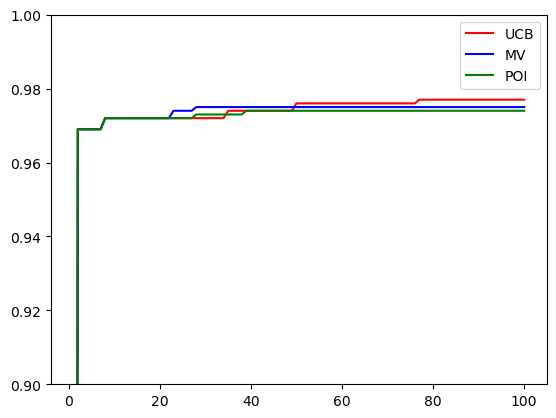

In [25]:
# now plot the results

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1,101), outY2max_UCB, color = "red", label = "UCB")
ax.plot(range(1,101), outY2max_MV, color = "blue", label = "MV")
ax.plot(range(1,101), outY2max_POI, color = "green", label = "POI")
ax.set_ylim(0.9,1.0)
ax.legend(loc = "best")
plt.savefig("chart1.png")
plt.show()

we can see that the bayesian optimisation did help to find the optimum hyperparamters.  In this case the maximum variance acquisition function was the quickest to improve the hyperparameter values, but the UCB found the best result in the long run. 